In [2]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score
import pandas as pd
import datetime as dt
import numpy as np
from tqdm import tqdm

In [3]:
data_path = '/content/drive/MyDrive/2024 UW ENGINE Capstone/data/NERC_GIC/dataset'
csv_files_train = [file for file in os.listdir(data_path) if file.endswith('.csv') and not file.startswith('GIC_dataset_2023')]

csv_files_test = [file for file in os.listdir(data_path) if file.endswith('.csv') and file.startswith('GIC_dataset_2023')]
# Create an empty list to store DataFrames
df_list_train = []
df_list_test = []
# Loop through each CSV file
for file in csv_files_train:
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(os.path.join(data_path, file))
    df = df.drop(columns=df.columns[0], axis=1)
    df_list_train.append(df)

for file in csv_files_test:
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(os.path.join(data_path, file))
    df = df.drop(columns=df.columns[0], axis=1)
    df_list_test.append(df)

In [4]:
combined_df_train = pd.concat(df_list_train, ignore_index=True)
combined_df_test = pd.concat(df_list_test, ignore_index=True)

In [5]:
combined_df_train

,datetime,glon,glat,mlon,mlat,mlt,dbn_nez,dbe_nez,BX_GSE,BY_GSM,BZ_GSM,flow_speed,proton_density,T,Pressure,SYM_H,CLOCK_ANGLE_GSM,GICMeasured,Lat,Long
0,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,6.16,415.9,16.23,34695.0,5.61,13,345.38,-0.088000,33.4,247.5
1,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,6.16,415.9,16.23,34695.0,5.61,13,345.38,-0.179000,47.4,258.8
2,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,6.16,415.9,16.23,34695.0,5.61,13,345.38,-0.610667,47.4,258.8
3,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,6.16,415.9,16.23,34695.0,5.61,13,345.38,-0.183000,47.4,258.8
4,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,6.16,415.9,16.23,34695.0,5.61,13,345.38,0.778333,47.4,258.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961651,2021-11-04 23:55:00,236.58,48.52,-62.046574,53.616430,15.032155,-15.499084,9.997249,-7.63,4.32,10.46,614.1,2.15,18210.0,1.63,-50,23.34,-1.015200,45.3,237.2
3961652,2021-11-04 23:55:00,236.58,48.52,-62.046574,53.616430,15.032155,-15.499084,9.997249,-7.63,4.32,10.46,614.1,2.15,18210.0,1.63,-50,23.34,5.700000,45.7,237.4
3961653,2021-11-04 23:55:00,236.58,48.52,-62.046574,53.616430,15.032155,-15.499084,9.997249,-7.63,4.32,10.46,614.1,2.15,18210.0,1.63,-50,23.34,1.663600,47.5,239.7
3961654,2021-11-04 23:55:00,236.58,48.52,-62.046574,53.616430,15.032155,-15.499084,9.997249,-7.63,4.32,10.46,614.1,2.15,18210.0,1.63,-50,23.34,-4.123600,47.8,237.8


In [6]:
combined_df_test

,datetime,glon,glat,mlon,mlat,mlt,dbn_nez,dbe_nez,BX_GSE,BY_GSM,BZ_GSM,flow_speed,proton_density,T,Pressure,SYM_H,CLOCK_ANGLE_GSM,GICMeasured,Lat,Long
0,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,-4.09,365.7,4.39,34437.0,1.17,-13,215.74,-1.244000,44.9,263.0
1,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,-4.09,365.7,4.39,34437.0,1.17,-13,215.74,0.410333,43.6,243.7
2,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,-4.09,365.7,4.39,34437.0,1.17,-13,215.74,-0.292000,42.8,245.6
3,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,-4.09,365.7,4.39,34437.0,1.17,-13,215.74,1.363333,35.8,253.9
4,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,-4.09,365.7,4.39,34437.0,1.17,-13,215.74,0.000000,44.4,263.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836256,2023-03-24 23:55:00,236.58,48.52,-62.046574,53.616430,14.872775,-21.050753,-33.047325,5.73,-7.46,-2.42,472.3,3.52,105536.0,1.57,-55,252.32,-2.549200,45.3,237.2
1836257,2023-03-24 23:55:00,236.58,48.52,-62.046574,53.616430,14.872775,-21.050753,-33.047325,5.73,-7.46,-2.42,472.3,3.52,105536.0,1.57,-55,252.32,5.800000,45.7,237.4
1836258,2023-03-24 23:55:00,236.58,48.52,-62.046574,53.616430,14.872775,-21.050753,-33.047325,5.73,-7.46,-2.42,472.3,3.52,105536.0,1.57,-55,252.32,1.156800,47.5,239.7
1836259,2023-03-24 23:55:00,236.58,48.52,-62.046574,53.616430,14.872775,-21.050753,-33.047325,5.73,-7.46,-2.42,472.3,3.52,105536.0,1.57,-55,252.32,-3.698000,47.8,237.8


In [7]:
filtered_df = df[df['GICMeasured'] > 1]

# Print the filtered dataframe
print(filtered_df)

                   datetime    glon   glat       mlon       mlat        mlt  \
15      2023-03-23 00:00:00  254.76  40.14 -38.690166  48.520866  16.493734   
20      2023-03-23 00:00:00  254.76  40.14 -38.690166  48.520866  16.493734   
23      2023-03-23 00:00:00  254.76  40.14 -38.690166  48.520866  16.493734   
24      2023-03-23 00:00:00  254.76  40.14 -38.690166  48.520866  16.493734   
27      2023-03-23 00:00:00  254.76  40.14 -38.690166  48.520866  16.493734   
...                     ...     ...    ...        ...        ...        ...   
661328  2023-03-24 23:50:00  236.58  48.52 -62.046574  53.616430  14.790490   
661336  2023-03-24 23:55:00  236.58  48.52 -62.046574  53.616430  14.872775   
661343  2023-03-24 23:55:00  236.58  48.52 -62.046574  53.616430  14.872775   
661344  2023-03-24 23:55:00  236.58  48.52 -62.046574  53.616430  14.872775   
661346  2023-03-24 23:55:00  236.58  48.52 -62.046574  53.616430  14.872775   

          dbn_nez    dbe_nez  BX_GSE  BY_GSM  BZ_GS

In [8]:
combined_df_train['datetime'] = pd.to_datetime(combined_df_train['datetime'])

# Extract year
combined_df_train['year'] = combined_df_train['datetime'].dt.year

# Extract month
combined_df_train['month'] = combined_df_train['datetime'].dt.month

# Extract day
combined_df_train['day'] = combined_df_train['datetime'].dt.day

# Extract hour
combined_df_train['hour'] = combined_df_train['datetime'].dt.hour

# Extract minute
combined_df_train['minute'] = combined_df_train['datetime'].dt.minute

# Extract second
combined_df_train['second'] = combined_df_train['datetime'].dt.second

# Extract day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
combined_df_train['day_of_week'] = combined_df_train['datetime'].dt.dayofweek

In [9]:
combined_df_train

,datetime,glon,glat,mlon,mlat,mlt,dbn_nez,dbe_nez,BX_GSE,BY_GSM,...,GICMeasured,Lat,Long,year,month,day,hour,minute,second,day_of_week
0,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,...,-0.088000,33.4,247.5,2015,3,17,3,0,0,1
1,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,...,-0.179000,47.4,258.8,2015,3,17,3,0,0,1
2,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,...,-0.610667,47.4,258.8,2015,3,17,3,0,0,1
3,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,...,-0.183000,47.4,258.8,2015,3,17,3,0,0,1
4,2015-03-17 03:00:00,254.76,40.14,-38.690166,48.520866,19.470329,8.752354,2.677541,-5.83,-1.50,...,0.778333,47.4,258.8,2015,3,17,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961651,2021-11-04 23:55:00,236.58,48.52,-62.046574,53.616430,15.032155,-15.499084,9.997249,-7.63,4.32,...,-1.015200,45.3,237.2,2021,11,4,23,55,0,3
3961652,2021-11-04 23:55:00,236.58,48.52,-62.046574,53.616430,15.032155,-15.499084,9.997249,-7.63,4.32,...,5.700000,45.7,237.4,2021,11,4,23,55,0,3
3961653,2021-11-04 23:55:00,236.58,48.52,-62.046574,53.616430,15.032155,-15.499084,9.997249,-7.63,4.32,...,1.663600,47.5,239.7,2021,11,4,23,55,0,3
3961654,2021-11-04 23:55:00,236.58,48.52,-62.046574,53.616430,15.032155,-15.499084,9.997249,-7.63,4.32,...,-4.123600,47.8,237.8,2021,11,4,23,55,0,3


In [10]:
combined_df_test['datetime'] = pd.to_datetime(combined_df_test['datetime'])

# Extract year
combined_df_test['year'] = combined_df_test['datetime'].dt.year

# Extract month
combined_df_test['month'] = combined_df_test['datetime'].dt.month

# Extract day
combined_df_test['day'] = combined_df_test['datetime'].dt.day

# Extract hour
combined_df_test['hour'] = combined_df_test['datetime'].dt.hour

# Extract minute
combined_df_test['minute'] = combined_df_test['datetime'].dt.minute

# Extract second
combined_df_test['second'] = combined_df_test['datetime'].dt.second

# Extract day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday)
combined_df_test['day_of_week'] = combined_df_test['datetime'].dt.dayofweek

In [11]:
combined_df_test

,datetime,glon,glat,mlon,mlat,mlt,dbn_nez,dbe_nez,BX_GSE,BY_GSM,...,GICMeasured,Lat,Long,year,month,day,hour,minute,second,day_of_week
0,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,...,-1.244000,44.9,263.0,2023,4,23,0,0,0,6
1,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,...,0.410333,43.6,243.7,2023,4,23,0,0,0,6
2,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,...,-0.292000,42.8,245.6,2023,4,23,0,0,0,6
3,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,...,1.363333,35.8,253.9,2023,4,23,0,0,0,6
4,2023-04-23 00:00:00,254.76,40.14,-38.690166,48.520866,16.752737,-8.992366,-8.311064,-1.44,-3.03,...,0.000000,44.4,263.5,2023,4,23,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836256,2023-03-24 23:55:00,236.58,48.52,-62.046574,53.616430,14.872775,-21.050753,-33.047325,5.73,-7.46,...,-2.549200,45.3,237.2,2023,3,24,23,55,0,4
1836257,2023-03-24 23:55:00,236.58,48.52,-62.046574,53.616430,14.872775,-21.050753,-33.047325,5.73,-7.46,...,5.800000,45.7,237.4,2023,3,24,23,55,0,4
1836258,2023-03-24 23:55:00,236.58,48.52,-62.046574,53.616430,14.872775,-21.050753,-33.047325,5.73,-7.46,...,1.156800,47.5,239.7,2023,3,24,23,55,0,4
1836259,2023-03-24 23:55:00,236.58,48.52,-62.046574,53.616430,14.872775,-21.050753,-33.047325,5.73,-7.46,...,-3.698000,47.8,237.8,2023,3,24,23,55,0,4


In [87]:
testing_df = combined_df_test[combined_df_test['datetime'] >= '2023-04-23 00:00:00']

In [88]:
testing_df = testing_df.drop_duplicates()

In [89]:
testing_df = testing_df[testing_df['Lat'] == 39.0]

In [92]:
testing_df = testing_df[testing_df['Long'] == 281.8]

In [93]:
testing_df

,datetime,glon,glat,mlon,mlat,mlt,dbn_nez,dbe_nez,BX_GSE,BY_GSM,...,GICMeasured,Lat,Long,year,month,day,hour,minute,second,day_of_week
57846,2023-04-23 00:00:00,282.63,38.20,-0.641875,48.047054,19.289289,-0.982825,3.766039,-1.44,-3.03,...,-0.238667,39.0,281.8,2023,4,23,0,0,0,6
57959,2023-04-23 00:05:00,282.63,38.20,-0.641875,48.047054,19.370729,-2.600120,5.595415,0.29,-3.43,...,-0.200667,39.0,281.8,2023,4,23,0,5,0,6
58072,2023-04-23 00:10:00,282.63,38.20,-0.641875,48.047054,19.451943,-2.160867,6.643615,1.07,-3.78,...,-0.473000,39.0,281.8,2023,4,23,0,10,0,6
58185,2023-04-23 00:15:00,282.63,38.20,-0.641875,48.047054,19.533043,-2.033851,7.209102,0.91,-4.17,...,-0.126333,39.0,281.8,2023,4,23,0,15,0,6
58298,2023-04-23 00:20:00,282.63,38.20,-0.641875,48.047054,19.614032,-2.113619,6.079700,1.77,-3.94,...,0.438667,39.0,281.8,2023,4,23,0,20,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357496,2023-04-24 23:35:00,282.22,48.05,-0.425689,57.859318,18.908162,-19.627043,-4.706398,1.91,-0.35,...,1.083000,39.0,281.8,2023,4,24,23,35,0,0
357596,2023-04-24 23:40:00,282.22,48.05,-0.425689,57.859318,18.989973,-29.148159,-9.716585,3.76,1.02,...,1.654333,39.0,281.8,2023,4,24,23,40,0,0
357696,2023-04-24 23:45:00,282.22,48.05,-0.425689,57.859318,19.071670,-27.697608,-10.069420,4.17,0.31,...,1.173333,39.0,281.8,2023,4,24,23,45,0,0
357796,2023-04-24 23:50:00,282.22,48.05,-0.425689,57.859318,19.153247,-33.580710,-12.099250,3.98,0.43,...,1.532667,39.0,281.8,2023,4,24,23,50,0,0


In [94]:
# Define a function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [100]:
from sklearn.model_selection import train_test_split

# Split the combined dataframe into training and testing sets
# X = combined_df[['year', 'month', 'day', 'hour', 'minute', 'second',  'dbn_nez', 'dbe_nez']]
x_columns = combined_df_train.columns.difference(["GICMeasured", "datetime", "glon", "glat", "lat", "long"])

y_columns = ['GICMeasured']

x_train = combined_df_train[x_columns]
y_train = combined_df_train[y_columns]

x_test = testing_df[x_columns]
y_test = testing_df[y_columns]

In [101]:
x_train

,BX_GSE,BY_GSM,BZ_GSM,CLOCK_ANGLE_GSM,Lat,Long,Pressure,SYM_H,T,day,...,flow_speed,hour,minute,mlat,mlon,mlt,month,proton_density,second,year
0,-5.83,-1.50,6.16,345.38,33.4,247.5,5.61,13,34695.0,17,...,415.9,3,0,48.520866,-38.690166,19.470329,3,16.23,0,2015
1,-5.83,-1.50,6.16,345.38,47.4,258.8,5.61,13,34695.0,17,...,415.9,3,0,48.520866,-38.690166,19.470329,3,16.23,0,2015
2,-5.83,-1.50,6.16,345.38,47.4,258.8,5.61,13,34695.0,17,...,415.9,3,0,48.520866,-38.690166,19.470329,3,16.23,0,2015
3,-5.83,-1.50,6.16,345.38,47.4,258.8,5.61,13,34695.0,17,...,415.9,3,0,48.520866,-38.690166,19.470329,3,16.23,0,2015
4,-5.83,-1.50,6.16,345.38,47.4,258.8,5.61,13,34695.0,17,...,415.9,3,0,48.520866,-38.690166,19.470329,3,16.23,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961651,-7.63,4.32,10.46,23.34,45.3,237.2,1.63,-50,18210.0,4,...,614.1,23,55,53.616430,-62.046574,15.032155,11,2.15,0,2021
3961652,-7.63,4.32,10.46,23.34,45.7,237.4,1.63,-50,18210.0,4,...,614.1,23,55,53.616430,-62.046574,15.032155,11,2.15,0,2021
3961653,-7.63,4.32,10.46,23.34,47.5,239.7,1.63,-50,18210.0,4,...,614.1,23,55,53.616430,-62.046574,15.032155,11,2.15,0,2021
3961654,-7.63,4.32,10.46,23.34,47.8,237.8,1.63,-50,18210.0,4,...,614.1,23,55,53.616430,-62.046574,15.032155,11,2.15,0,2021


In [102]:
y_train

,GICMeasured
0,-0.088000
1,-0.179000
2,-0.610667
3,-0.183000
4,0.778333
...,...
3961651,-1.015200
3961652,5.700000
3961653,1.663600
3961654,-4.123600


In [103]:
x_test

,BX_GSE,BY_GSM,BZ_GSM,CLOCK_ANGLE_GSM,Lat,Long,Pressure,SYM_H,T,day,...,flow_speed,hour,minute,mlat,mlon,mlt,month,proton_density,second,year
57846,-1.44,-3.03,-4.09,215.74,39.0,281.8,1.17,-13,34437.0,23,...,365.7,0,0,48.047054,-0.641875,19.289289,4,4.39,0,2023
57959,0.29,-3.43,-4.09,220.22,39.0,281.8,1.05,-15,31500.0,23,...,352.1,0,5,48.047054,-0.641875,19.370729,4,4.21,0,2023
58072,1.07,-3.78,-3.82,222.92,39.0,281.8,1.00,-15,37170.0,23,...,340.2,0,10,48.047054,-0.641875,19.451943,4,4.31,0,2023
58185,0.91,-4.17,-3.48,230.08,39.0,281.8,1.00,-15,36038.0,23,...,344.7,0,15,48.047054,-0.641875,19.533043,4,4.22,0,2023
58298,1.77,-3.94,-3.38,227.72,39.0,281.8,0.89,-15,34945.0,23,...,335.8,0,20,48.047054,-0.641875,19.614032,4,3.97,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357496,1.91,-0.35,12.27,141.24,39.0,281.8,1.02,-56,111739.0,24,...,473.4,23,35,57.859318,-0.425689,18.908162,4,2.29,0,2023
357596,3.76,1.02,11.62,5.80,39.0,281.8,0.70,-59,110636.0,24,...,488.3,23,40,57.859318,-0.425689,18.989973,4,1.47,0,2023
357696,4.17,0.31,10.93,1.84,39.0,281.8,0.65,-59,135775.0,24,...,500.1,23,45,57.859318,-0.425689,19.071670,4,1.30,0,2023
357796,3.98,0.43,10.50,2.44,39.0,281.8,0.95,-62,119113.0,24,...,505.1,23,50,57.859318,-0.425689,19.153247,4,1.84,0,2023


In [104]:
y_test

,GICMeasured
57846,-0.238667
57959,-0.200667
58072,-0.473000
58185,-0.126333
58298,0.438667
...,...
357496,1.083000
357596,1.654333
357696,1.173333
357796,1.532667


In [105]:
# Initialize models
linear_reg_model = LinearRegression()
# Train models
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [117]:
y_lr_predict = linear_reg_model.predict(x_test)

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_lr_predict)
mae = mean_absolute_error(y_test, y_lr_predict)
print("Mean Squared Error (MSE):", mse)
print("Mean absolute Error (MSE):", mae)

Mean Squared Error (MSE): 6.040029545730529
Mean absolute Error (MSE): 1.4115875188492315


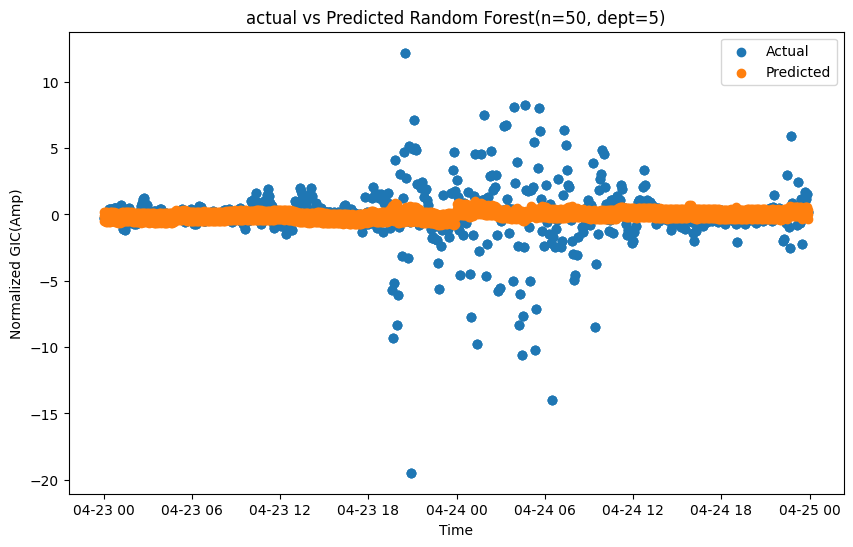

In [119]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(list(testing_df['datetime']), y_test, label='Actual')
plt.scatter(list(testing_df['datetime']), y_lr_predict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized GIC(Amp)')
plt.title('actual vs Predicted Random Forest(n=50, dept=5)')
plt.legend()
plt.show()

In [120]:
residual_lr = y_lr_predict - y_test

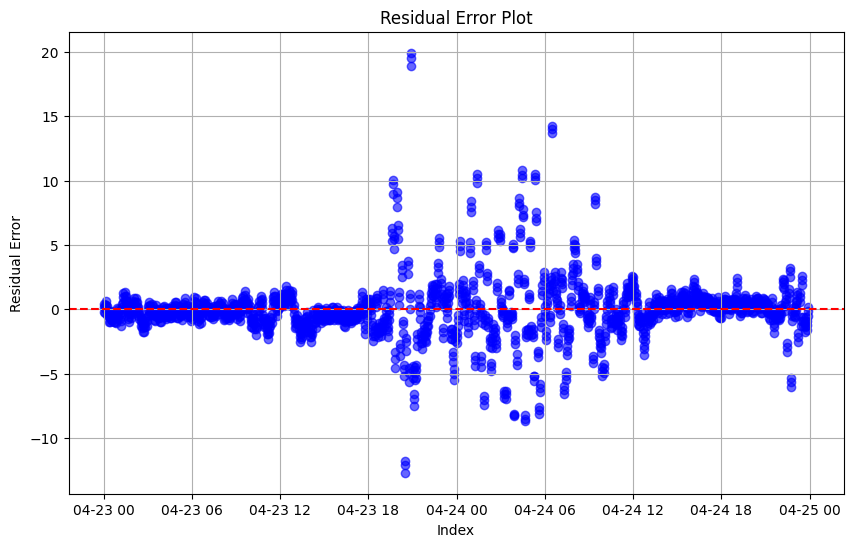

In [121]:
#residual
plt.figure(figsize=(10, 6))
plt.scatter(list(testing_df['datetime']), residual_lr, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Adding a horizontal line at y=0 for reference
plt.xlabel('Date')
plt.ylabel('Residual Error')
plt.title('Residual Error Plot')
plt.grid(True)
plt.show()

Random Forest on GPU

In [123]:
# normalizing Data
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler_x_rf = MinMaxScaler()
scaler_y_rf = MinMaxScaler()
# Normalize the input data (X_train)
X_train_normalized = scaler_x_rf.fit_transform(x_train)

# Normalize the target data (y_train), if necessary
# Assuming y_train is a single column DataFrame or a 1D array
y_train_normalized = scaler_y_rf.fit_transform(y_train.values.reshape(-1, 1))

In [122]:
random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=5)
# decision_tree_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)

<ipython-input-122-6aef00a70787>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(x_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=50)

In [129]:
RF_predict = random_forest_model.predict(x_test)

In [125]:
RF_predict

array([0.04651618, 0.04651618, 0.04651618, ..., 0.04651618, 0.04651618,
       0.04651618])

In [136]:
y_test

,GICMeasured
57846,-0.238667
57959,-0.200667
58072,-0.473000
58185,-0.126333
58298,0.438667
...,...
357496,1.083000
357596,1.654333
357696,1.173333
357796,1.532667


In [126]:
# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, RF_predict)
mae = mean_absolute_error(y_test, RF_predict)
print("Mean Squared Error (MSE):", mse)
print("Mean absolute Error (MSE):", mae)

Mean Squared Error (MSE): 5.924578405265655
Mean absolute Error (MSE): 1.3513902216268272


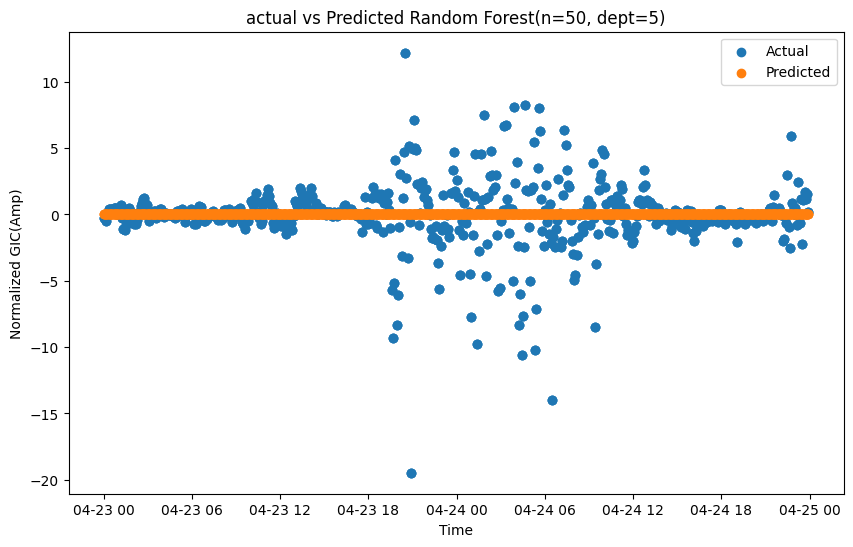

In [130]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(list(testing_df['datetime']), y_test, label='Actual')
plt.scatter(list(testing_df['datetime']), RF_predict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized GIC(Amp)')
plt.title('actual vs Predicted Random Forest(n=50, dept=5)')
plt.legend()
plt.show()

In [134]:
print(len(RF_predict))
print(len(y_test))

1728
1728


In [139]:
testing_df

,datetime,glon,glat,mlon,mlat,mlt,dbn_nez,dbe_nez,BX_GSE,BY_GSM,...,GICMeasured,Lat,Long,year,month,day,hour,minute,second,day_of_week
57846,2023-04-23 00:00:00,282.63,38.20,-0.641875,48.047054,19.289289,-0.982825,3.766039,-1.44,-3.03,...,-0.238667,39.0,281.8,2023,4,23,0,0,0,6
57959,2023-04-23 00:05:00,282.63,38.20,-0.641875,48.047054,19.370729,-2.600120,5.595415,0.29,-3.43,...,-0.200667,39.0,281.8,2023,4,23,0,5,0,6
58072,2023-04-23 00:10:00,282.63,38.20,-0.641875,48.047054,19.451943,-2.160867,6.643615,1.07,-3.78,...,-0.473000,39.0,281.8,2023,4,23,0,10,0,6
58185,2023-04-23 00:15:00,282.63,38.20,-0.641875,48.047054,19.533043,-2.033851,7.209102,0.91,-4.17,...,-0.126333,39.0,281.8,2023,4,23,0,15,0,6
58298,2023-04-23 00:20:00,282.63,38.20,-0.641875,48.047054,19.614032,-2.113619,6.079700,1.77,-3.94,...,0.438667,39.0,281.8,2023,4,23,0,20,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357496,2023-04-24 23:35:00,282.22,48.05,-0.425689,57.859318,18.908162,-19.627043,-4.706398,1.91,-0.35,...,1.083000,39.0,281.8,2023,4,24,23,35,0,0
357596,2023-04-24 23:40:00,282.22,48.05,-0.425689,57.859318,18.989973,-29.148159,-9.716585,3.76,1.02,...,1.654333,39.0,281.8,2023,4,24,23,40,0,0
357696,2023-04-24 23:45:00,282.22,48.05,-0.425689,57.859318,19.071670,-27.697608,-10.069420,4.17,0.31,...,1.173333,39.0,281.8,2023,4,24,23,45,0,0
357796,2023-04-24 23:50:00,282.22,48.05,-0.425689,57.859318,19.153247,-33.580710,-12.099250,3.98,0.43,...,1.532667,39.0,281.8,2023,4,24,23,50,0,0


In [144]:
residual_rf = RF_predict - y_test['GICMeasured']

In [145]:
residual_rf

57846     0.285183
57959     0.247183
58072     0.519516
58185     0.172850
58298    -0.392150
            ...   
357496   -1.036484
357596   -1.607817
357696   -1.126817
357796   -1.486150
357895   -0.105766
Name: GICMeasured, Length: 1728, dtype: float64

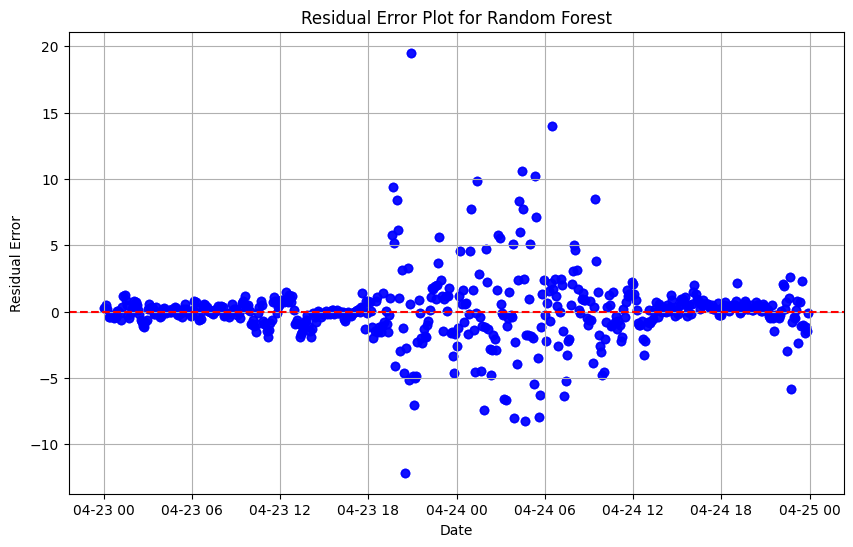

In [146]:
#residual
plt.figure(figsize=(10, 6))
plt.scatter(list(testing_df['datetime']), residual_rf, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='ideal')  # Adding a horizontal line at y=0 for reference
plt.xlabel('Date')
plt.ylabel('Residual Error')
plt.title('Residual Error Plot for Random Forest(n=50, d=5)')
plt.grid(True)
plt.show()

LSTM

In [147]:
#nornalizing Data
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
# Normalize the input data (X_train)
X_train_normalized = scaler_x.fit_transform(x_train)

# Normalize the target data (y_train), if necessary
# Assuming y_train is a single column DataFrame or a 1D array
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [149]:
X_train_normalized

array([[0.50609013, 0.41922941, 0.6323317 , ..., 0.22409471, 0.        ,
        0.22222222],
       [0.50609013, 0.41922941, 0.6323317 , ..., 0.22409471, 0.        ,
        0.22222222],
       [0.50609013, 0.41922941, 0.6323317 , ..., 0.22409471, 0.        ,
        0.22222222],
       ...,
       [0.46954933, 0.52209261, 0.69445247, ..., 0.02799443, 0.        ,
        0.88888889],
       [0.46954933, 0.52209261, 0.69445247, ..., 0.02799443, 0.        ,
        0.88888889],
       [0.46954933, 0.52209261, 0.69445247, ..., 0.02799443, 0.        ,
        0.88888889]])

In [150]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(10, input_shape=(1, X_train_normalized.shape[1])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_normalized.reshape(-1, 1, X_train_normalized.shape[1]),
                    y_train_normalized,
                    epochs=1,
                    validation_split=0.2)

99042/99042 [==============================] - 325s 3ms/step - loss: 6.3129e-04 - val_loss: 4.9291e-04


In [151]:

# Normalize the test data using the same scaler used for training data
X_test_normalized = scaler_x.transform(x_test)

# Predict on the test data
predictions = model.predict(X_test_normalized.reshape(-1, 1, X_train_normalized.shape[1]))

54/54 [==============================] - 0s 2ms/step


In [152]:
Y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

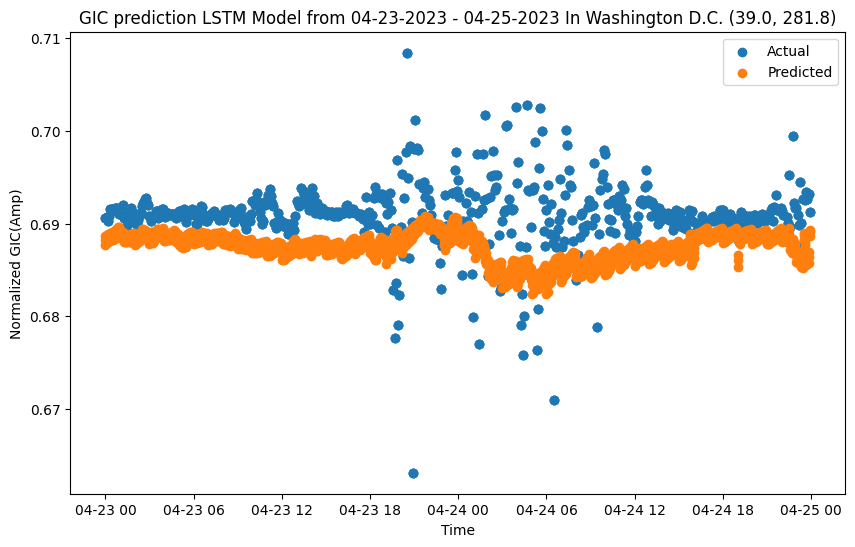

In [163]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(list(testing_df['datetime']), Y_test_normalized, label='Actual')
plt.scatter(list(testing_df['datetime']), predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized GIC(Amp)')
plt.title('GIC prediction LSTM Model from 04-23-2023 - 04-25-2023 In Washington D.C. (39.0, 281.8)')
plt.legend()
plt.show()

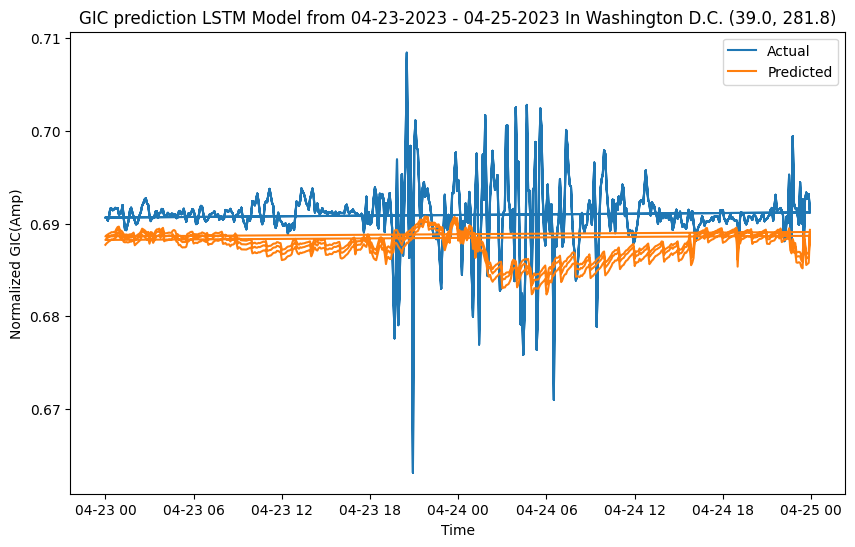

In [164]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(list(testing_df['datetime']), Y_test_normalized, label='Actual')
plt.plot(list(testing_df['datetime']), predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized GIC(Amp)')
plt.title('GIC prediction LSTM Model from 04-23-2023 - 04-25-2023 In Washington D.C. (39.0, 281.8)')
plt.legend()
plt.show()

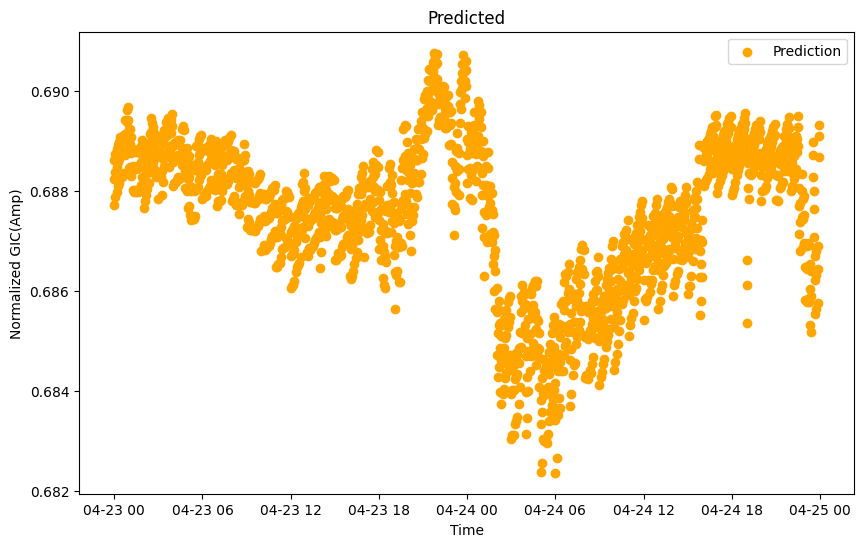

In [154]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(list(testing_df['datetime']), predictions, color='orange', label='Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized GIC(Amp)')
plt.title('Predicted')
plt.legend()
plt.show()

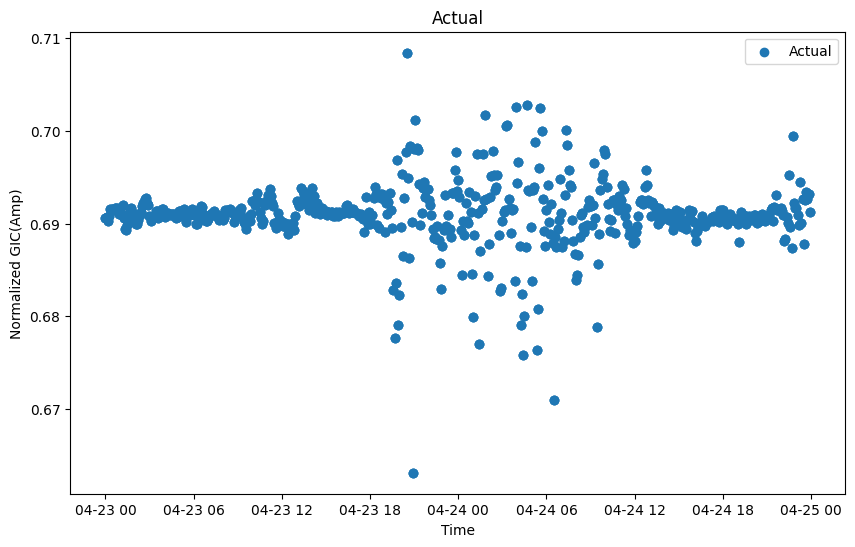

In [155]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(list(testing_df['datetime']), Y_test_normalized, label='Actual')
plt.xlabel('Time')
plt.ylabel('Normalized GIC(Amp)')
plt.title('Actual')
plt.legend()
plt.show()

In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test_normalized, predictions)
mae = mean_absolute_error(Y_test_normalized, predictions)
print("Mean Squared Error (MSE):", mse)
print("Mean absolute Error (MSE):", mae)

Mean Squared Error (MSE): 2.639476107603338e-05
Mean absolute Error (MSE): 0.00407405680870448


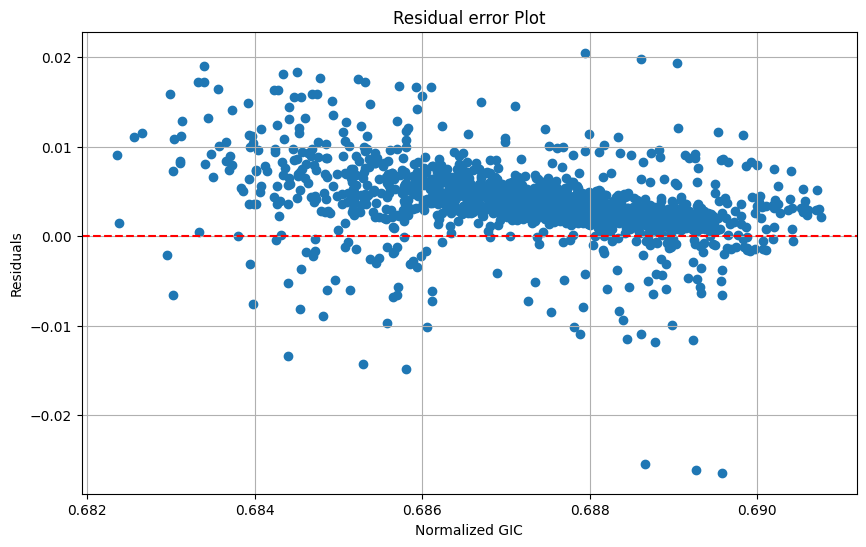

In [162]:
# Calculate residuals
residuals = Y_test_normalized - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Normalized GIC')
plt.ylabel('Residuals')
plt.title('Residual error Plot')
plt.grid(True)
plt.show()

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                1360      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1371 (5.36 KB)
Trainable params: 1371 (5.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
